In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
california = fetch_california_housing()

In [6]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
dataset = pd.DataFrame(california.data,columns=california.feature_names)

In [8]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
dataset['price'] = california.target

In [10]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [12]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [14]:
corr =dataset.corr()

<Axes: >

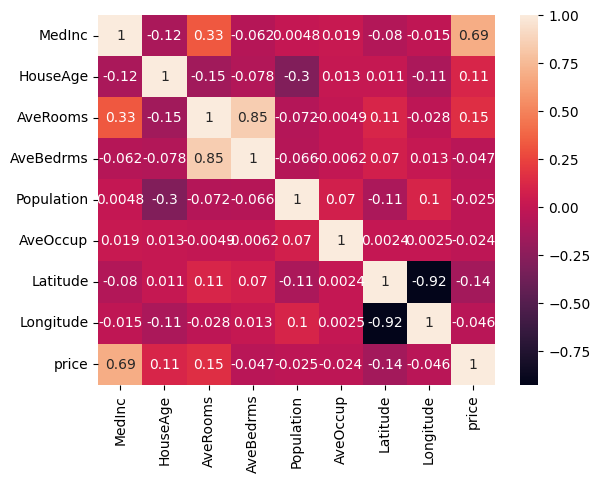

In [15]:
sns.heatmap(corr,annot=True)

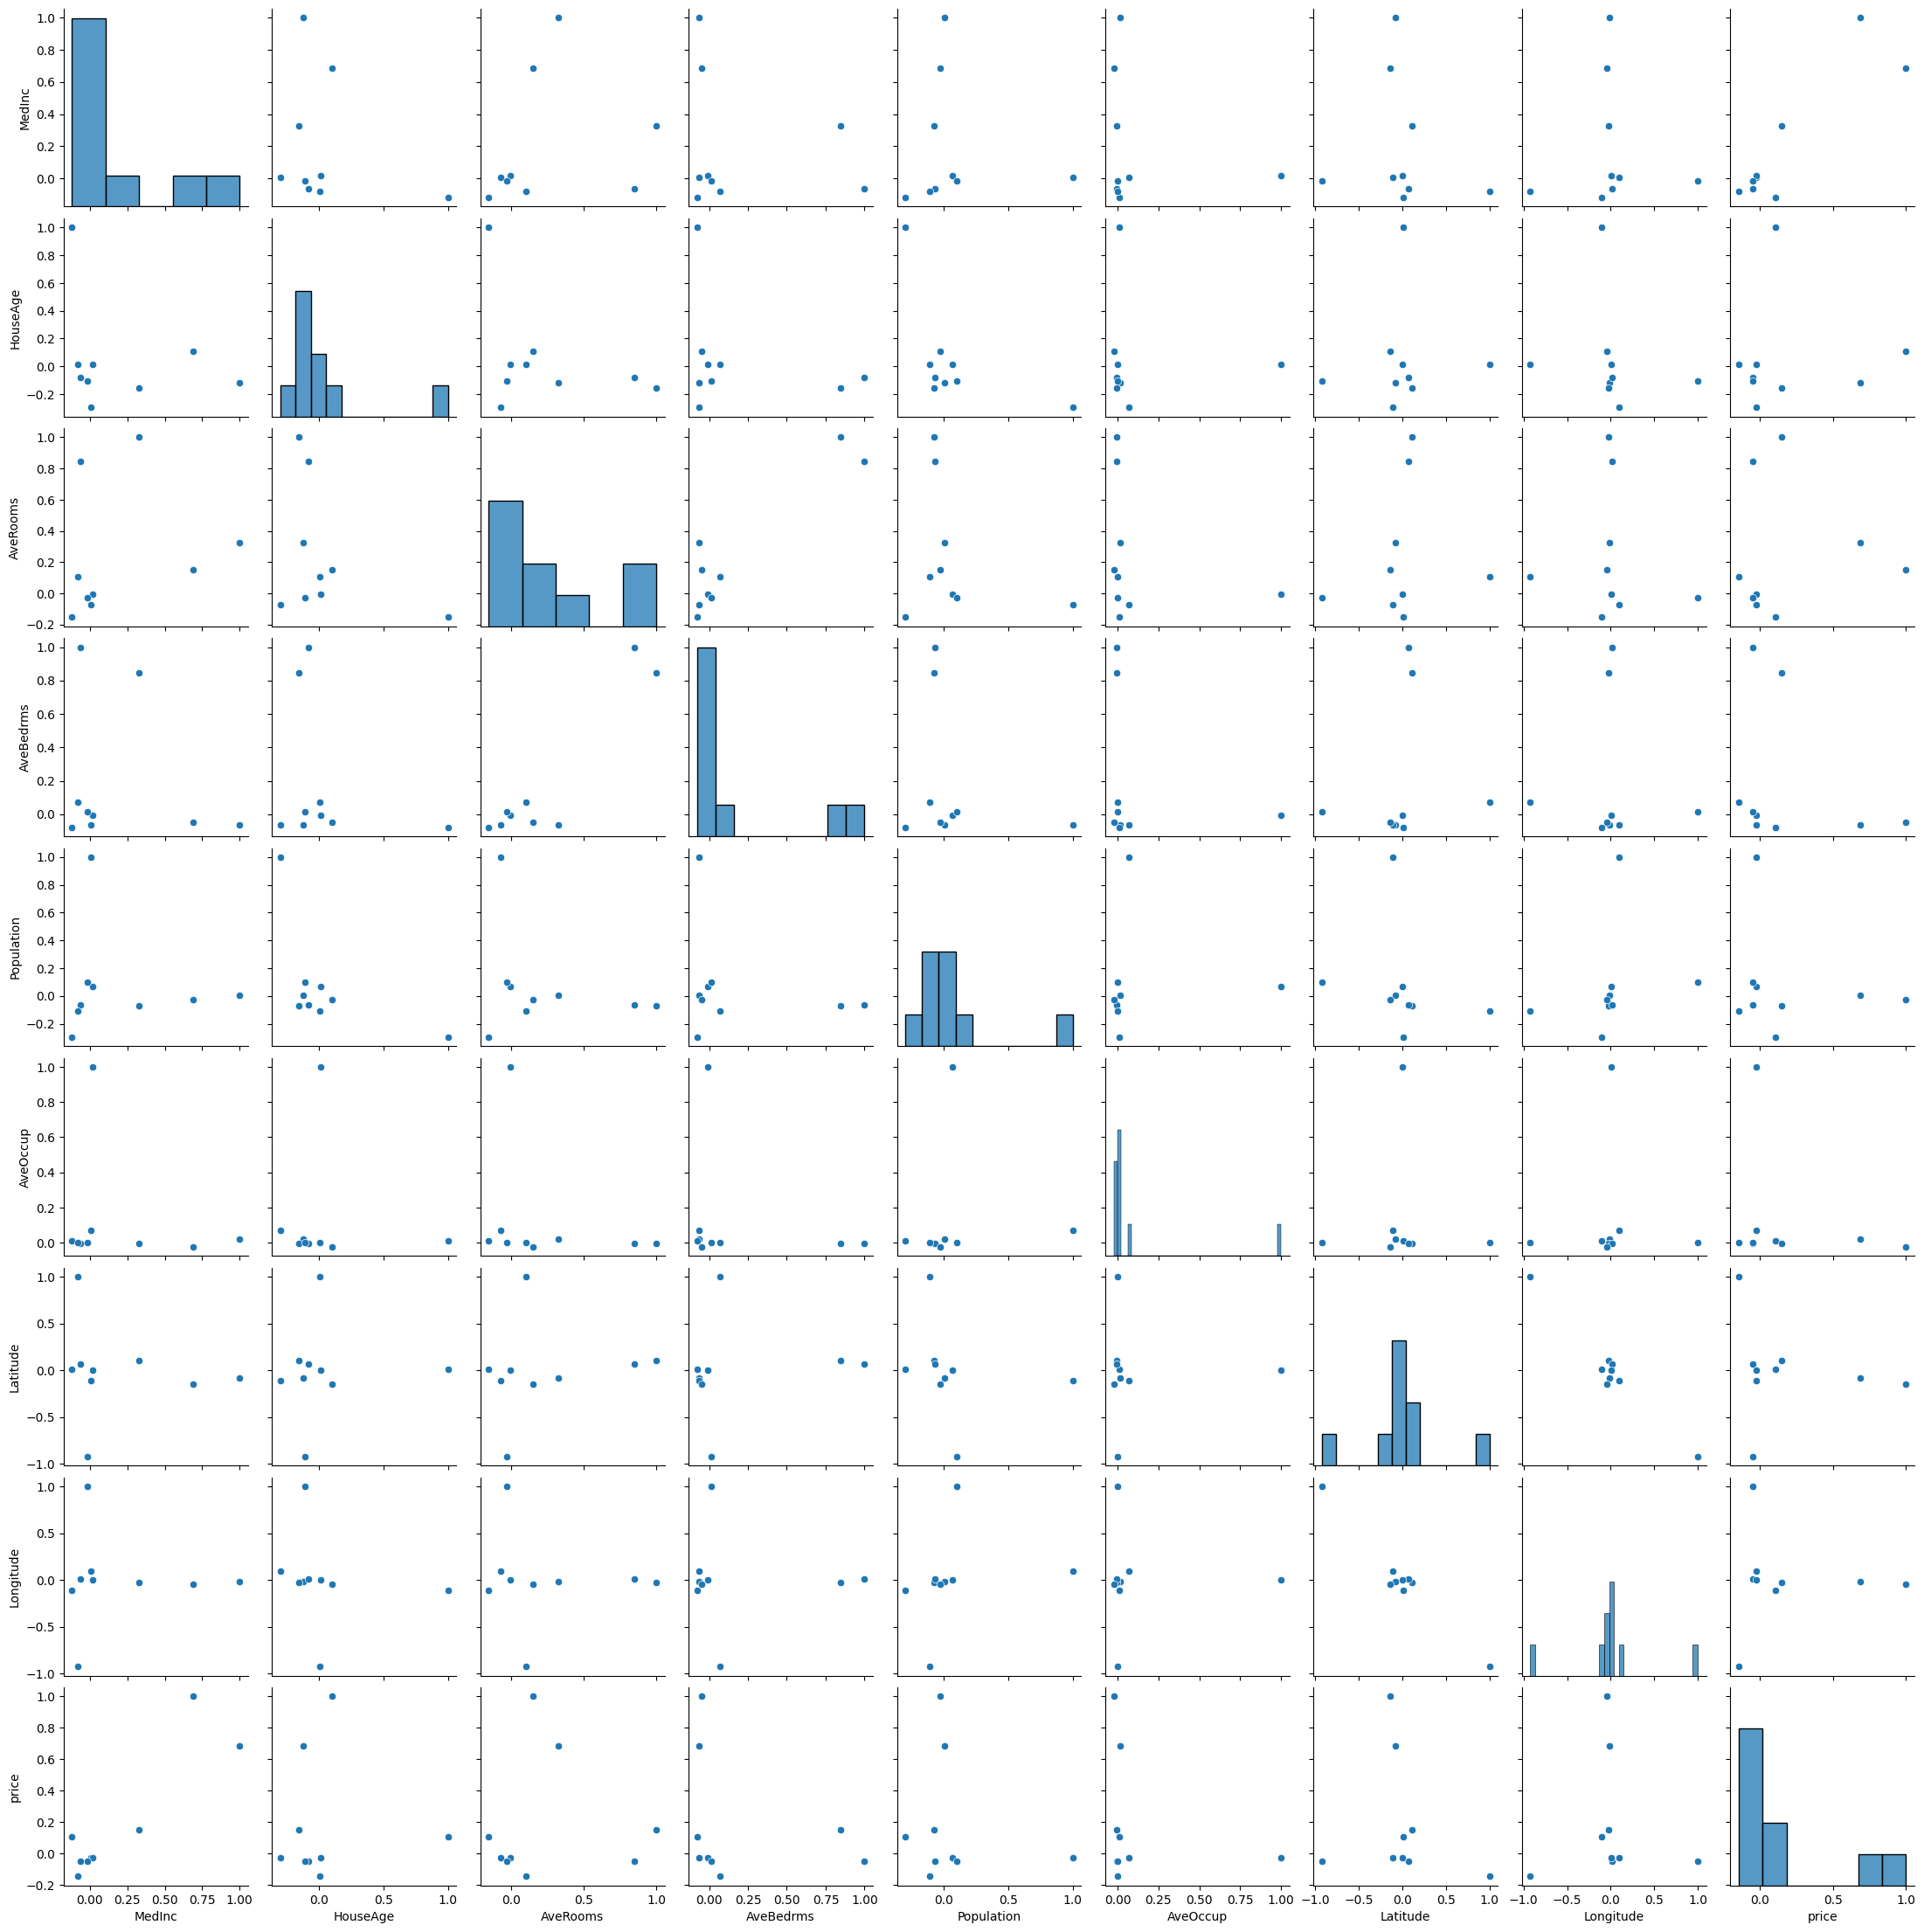

In [16]:
sns.pairplot(corr)

In [22]:
X = dataset.drop('price',axis=1)
X
y = dataset['price']
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64

### train test split


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)


### Scaling 


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model training


In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [27]:
print(regressor.coef_,regressor.intercept_)

[ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178] 2.0719469373788777


In [29]:
y_test_pred = regressor.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mse = mean_squared_error(y_test,y_test_pred)
mae = mean_absolute_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_test_pred)

In [32]:
print(mse,mae,rmse,score)

0.5558915986952444 0.5332001304956564 0.7455813830127764 0.5757877060324508


### Assumptions


Text(0, 0.5, 'TEst predicted data')

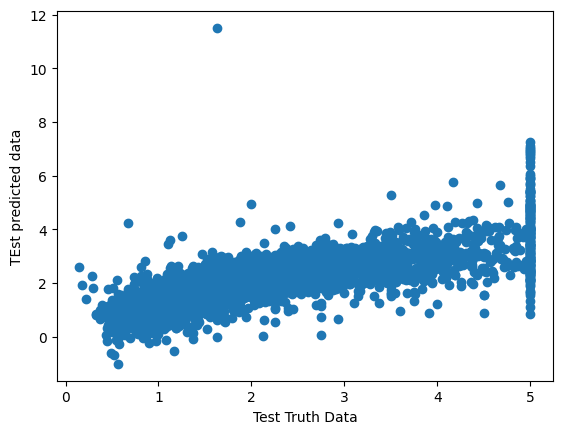

In [33]:
plt.scatter(y_test,y_test_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("TEst predicted data")

In [34]:
residuals = y_test - y_test_pred
residuals

20046   -0.242123
3024    -1.306017
15663    2.290351
20484   -0.652926
9814     0.175343
           ...   
15362    0.641254
16623    0.418161
18086    0.531240
2144    -0.464511
3665    -0.494403
Name: price, Length: 4128, dtype: float64

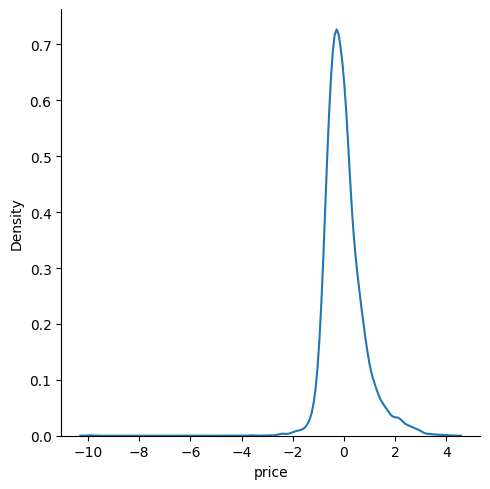

In [35]:
sns.displot(residuals,kind='kde')

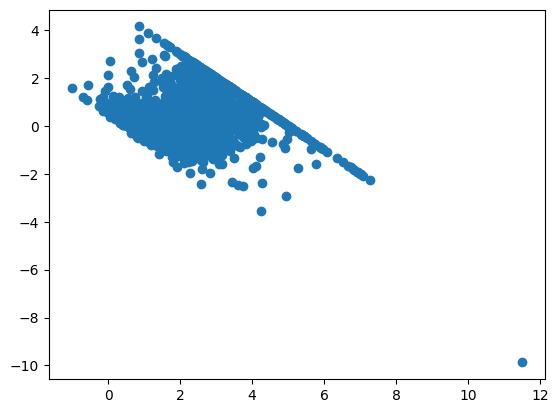

In [36]:
plt.scatter(y_test_pred,residuals)

In [38]:
regressor

LinearRegression()

### Pickling

In [39]:
import pickle
pickle.dump(regressor,open('regressor.pkl','wb'))


In [40]:
model = pickle.load(open('regressor.pkl','rb'))

In [41]:
model.predict(X_test)

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251], shape=(4128,))